<a href="https://colab.research.google.com/github/Syu1224/Google-Colaborately-Data-Science/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%80%E5%80%8B%E4%BA%BA%E3%80%80%E5%AE%9F%E5%8A%9B%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 環境の準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# 各データの読み込み
df_train = pd.read_csv('/content/drive/MyDrive/bank_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/bank_test.csv')
df_pred = pd.read_csv('//content/drive/MyDrive/bank_pred.csv')

### データの確認

In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,50.0,entrepreneur,married,secondary,no,1857,no,yes,-1.0,0,unknown,fail
1,37.0,technician,single,secondary,no,363,yes,no,-1.0,0,unknown,fail
2,35.0,blue-collar,married,primary,no,422,yes,no,-1.0,0,unknown,fail
3,55.0,retired,married,secondary,no,119,no,yes,-1.0,0,unknown,fail
4,40.0,blue-collar,single,secondary,no,1066,yes,no,-1.0,0,unknown,fail


In [ ]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail
1,54.0,management,married,tertiary,no,364,yes,no,-1.0,0,unknown,fail
2,35.0,technician,married,secondary,no,-180,no,yes,-1.0,0,unknown,success
3,58.0,retired,married,primary,no,69,no,no,-1.0,0,unknown,fail
4,48.0,management,married,tertiary,no,2351,no,no,105.0,3,success,success


In [ ]:
df_pred.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome
0,53,services,married,secondary,no,1364,no,no,-1,0,unknown
1,36,blue-collar,married,secondary,no,1949,yes,no,319,3,failure
2,40,admin.,married,unknown,no,3557,yes,no,-1,0,unknown
3,51,management,divorced,secondary,no,-175,yes,yes,-1,0,unknown
4,41,unemployed,married,secondary,no,277,yes,no,351,2,failure


## データの前処理

In [ ]:
df_train.duplicated(keep=False).value_counts()

False    6357
True       59
dtype: int64

In [ ]:
df_test.duplicated(keep=False).value_counts()

False    14678
True       322
dtype: int64

In [ ]:
df_pred.duplicated(keep=False).value_counts()

False    9982
True       18
dtype: int64

#### 全ての変数に重複あり 重複を削除

In [ ]:
df_train.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,50.0,entrepreneur,married,secondary,no,1857,no,yes,-1.0,0,unknown,fail
1,37.0,technician,single,secondary,no,363,yes,no,-1.0,0,unknown,fail
2,35.0,blue-collar,married,primary,no,422,yes,no,-1.0,0,unknown,fail
3,55.0,retired,married,secondary,no,119,no,yes,-1.0,0,unknown,fail
4,40.0,blue-collar,single,secondary,no,1066,yes,no,-1.0,0,unknown,fail
...,...,...,...,...,...,...,...,...,...,...,...,...
6411,28.0,student,single,secondary,no,153,no,no,-1.0,0,unknown,success
6412,33.0,management,married,tertiary,no,403,yes,no,-1.0,0,unknown,fail
6413,42.0,blue-collar,married,secondary,no,3,yes,no,-1.0,0,unknown,fail
6414,27.0,management,single,tertiary,no,390,no,no,104.0,2,failure,success


In [ ]:
df_test.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail
1,54.0,management,married,tertiary,no,364,yes,no,-1.0,0,unknown,fail
2,35.0,technician,married,secondary,no,-180,no,yes,-1.0,0,unknown,success
3,58.0,retired,married,primary,no,69,no,no,-1.0,0,unknown,fail
4,48.0,management,married,tertiary,no,2351,no,no,105.0,3,success,success
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,blue-collar,divorced,secondary,no,-244,yes,no,-1.0,0,unknown,fail
14996,53.0,self-employed,married,tertiary,no,730,yes,no,368.0,2,failure,fail
14997,31.0,management,married,tertiary,no,898,no,no,-1.0,0,unknown,fail
14998,49.0,blue-collar,married,primary,no,6429,no,no,-1.0,0,unknown,fail


In [ ]:
df_pred.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome
0,53,services,married,secondary,no,1364,no,no,-1,0,unknown
1,36,blue-collar,married,secondary,no,1949,yes,no,319,3,failure
2,40,admin.,married,unknown,no,3557,yes,no,-1,0,unknown
3,51,management,divorced,secondary,no,-175,yes,yes,-1,0,unknown
4,41,unemployed,married,secondary,no,277,yes,no,351,2,failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,34,entrepreneur,married,tertiary,no,1076,yes,no,-1,0,unknown
9996,53,technician,divorced,primary,no,-834,yes,yes,-1,0,unknown
9997,42,technician,divorced,secondary,no,324,yes,no,-1,0,unknown
9998,38,management,single,tertiary,no,231,no,no,-1,0,unknown


### train 前処理

In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age           90
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays         36
previous       0
poutcome     250
result         0
dtype: int64

#### 数値データ

In [ ]:
# データ統計量の確認
df_train.describe()

,age,balance,pdays,previous
count,6326.000000,6416.000000,6380.000000,6416.000000
mean,40.980398,1329.536160,39.616458,0.573410
std,10.612138,2711.424072,97.745220,1.955045
min,18.000000,-3313.000000,-1.000000,0.000000
25%,33.000000,75.000000,-1.000000,0.000000
50%,39.000000,473.000000,-1.000000,0.000000
75%,49.000000,1463.250000,-1.000000,0.000000
max,93.000000,43074.000000,838.000000,55.000000


##### age

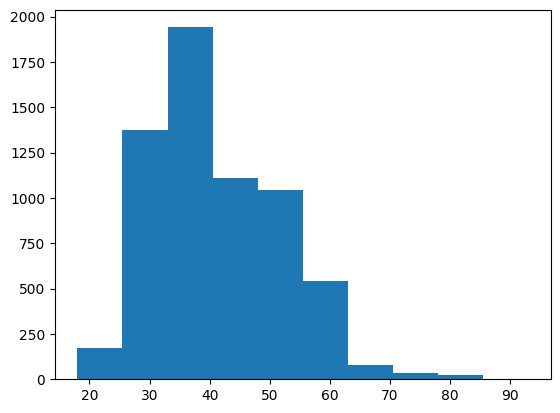

In [ ]:
plt.hist(df_train['age']);

In [ ]:
# 欠損値を平均値で補完
df_train = df_train.fillna({'age':df_train['age'].mean()})

##### pdays

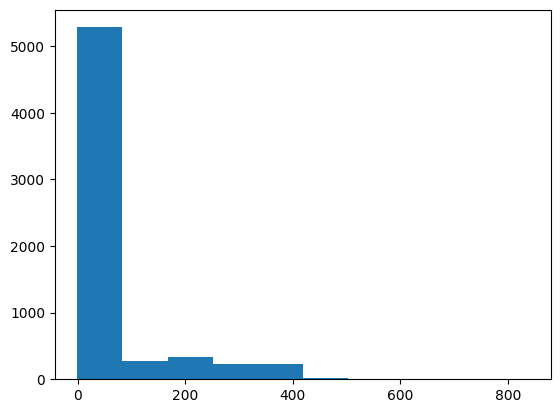

In [ ]:
plt.hist(df_train['pdays']);

In [ ]:
# 欠損値を中央値で補完
df_train = df_train.fillna({'pdays':df_train['pdays'].median()})

In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age            0
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays          0
previous       0
poutcome     250
result         0
dtype: int64

#### 文字列

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'job':df_train['job'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'marital':df_train['marital'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'default':df_train['default'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'housing':df_train['housing'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'loan':df_train['loan'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_train = df_train.fillna({'poutcome':df_train['poutcome'].mode()[0]})

In [ ]:
# 欠損値の数を確認
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

#### カテゴリカル変数

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_train_obj = df_train.select_dtypes(include='object')
df_train_obj.head(3)

,job,marital,education,default,housing,loan,poutcome,result
0,entrepreneur,married,secondary,no,no,yes,unknown,fail
1,technician,single,secondary,no,yes,no,unknown,fail
2,blue-collar,married,primary,no,yes,no,unknown,fail


In [ ]:
for uni in df_train_obj.columns:
    print(uni)
    print(df_train_obj[uni].unique())

job
['entrepreneur' 'technician' 'blue-collar' 'retired' 'management'
 'unknown' 'admin.' 'student' 'services' 'unemployed' 'self-employed'
 'housemaid']
marital
['married' 'single' 'divorced']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['yes' 'no']
poutcome
['unknown' 'success' 'failure' 'other']
result
['fail' 'success']


##### 2種類のものをLabel Encording

In [ ]:
# それぞれの列のユニークな値の数を確認
df_train_uni = df_train_obj.nunique()
df_train_uni

job          12
marital       3
education     4
default       2
housing       2
loan          2
poutcome      4
result        2
dtype: int64

In [ ]:
df_train_cols = df_train_uni[df_train_uni==2].index
df_train_cols

Index(['default', 'housing', 'loan', 'result'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_train_cols:
  le = LabelEncoder()
  le.fit(df_train[col])
  df_train[col] = le.transform(df_train[col])

In [ ]:
# Encodingが完了していることを確認
df_train[df_train_cols].head(2)

,default,housing,loan,result
0,0,0,1,0
1,0,1,0,0


##### job をクラス分け
- 高 entrepreneur, management, admin
- 中 technician, survices, self-employed
- 低 blue-collar, retired, unknown, student, unemployed housemaid

In [ ]:
df_train['job'].value_counts()

blue-collar      1441
management       1335
technician       1043
admin.            710
services          600
retired           326
entrepreneur      242
self-employed     225
unemployed        168
housemaid         159
student           117
unknown            50
Name: job, dtype: int64

In [ ]:
# クラス分けのリストの定義
class_3 = ['entrepreneur', 'management', 'admin.']
class_2 = ['technician', 'services', 'self-employed']
class_1 = ['blue-collar', 'retired', 'unknown', 'student', 'unemployed', 'housemaid']

In [ ]:
# それぞれを置換するリストの作成
job_class = []
for i in df_train_obj['job']:
    if i in class_3:
        job_class.append(3)
    elif i in class_2:
        job_class.append(2)
    elif i in class_1:
        job_class.append(1)

In [ ]:
# データフレームをコピー
df_train2 = df_train.copy()

In [ ]:
# 列を追加
df_train2['job_class']  = job_class

In [ ]:
df_train2

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result,job_class
0,50.0,entrepreneur,married,secondary,0,1857,0,1,-1.0,0,unknown,0,3
1,37.0,technician,single,secondary,0,363,1,0,-1.0,0,unknown,0,2
2,35.0,blue-collar,married,primary,0,422,1,0,-1.0,0,unknown,0,1
3,55.0,retired,married,secondary,0,119,0,1,-1.0,0,unknown,0,1
4,40.0,blue-collar,single,secondary,0,1066,1,0,-1.0,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,28.0,student,single,secondary,0,153,0,0,-1.0,0,unknown,1,1
6412,33.0,management,married,tertiary,0,403,1,0,-1.0,0,unknown,0,3
6413,42.0,blue-collar,married,secondary,0,3,1,0,-1.0,0,unknown,0,1
6414,27.0,management,single,tertiary,0,390,0,0,104.0,2,failure,1,3


##### One Hot Encording

In [ ]:
df_train2 = pd.get_dummies(df_train2, drop_first=True)

In [ ]:
df_train2

,age,default,balance,housing,loan,pdays,previous,result,job_class,job_blue-collar,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,50.0,0,1857,0,1,-1.0,0,0,3,0,...,0,0,1,0,1,0,0,0,0,1
1,37.0,0,363,1,0,-1.0,0,0,2,0,...,0,0,0,1,1,0,0,0,0,1
2,35.0,0,422,1,0,-1.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,55.0,0,119,0,1,-1.0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,40.0,0,1066,1,0,-1.0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,28.0,0,153,0,0,-1.0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
6412,33.0,0,403,1,0,-1.0,0,0,3,0,...,0,0,1,0,0,1,0,0,0,1
6413,42.0,0,3,1,0,-1.0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
6414,27.0,0,390,0,0,104.0,2,1,3,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
x_train_val = df_train2.drop('result', axis=1).values
t_train_val = df_train2['result'].values

In [ ]:
from sklearn.model_selection import train_test_split
# 検証用データセット：学習用データセット＝ 30 ： 70
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

### test 前処理

In [ ]:
# 欠損値の数を確認
df_test.isnull().sum()

age           35
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays         79
previous       0
poutcome     152
result         0
dtype: int64

#### 数値データ

In [ ]:
# データ統計量の確認
df_test.describe()

,age,balance,pdays,previous
count,14965.000000,15000.000000,14921.000000,15000.000000
mean,40.957701,1359.111600,41.122914,0.565267
std,10.618818,2975.221144,100.577961,1.753077
min,18.000000,-6847.000000,-1.000000,0.000000
25%,33.000000,71.000000,-1.000000,0.000000
50%,39.000000,447.000000,-1.000000,0.000000
75%,48.000000,1409.250000,-1.000000,0.000000
max,95.000000,66721.000000,838.000000,29.000000


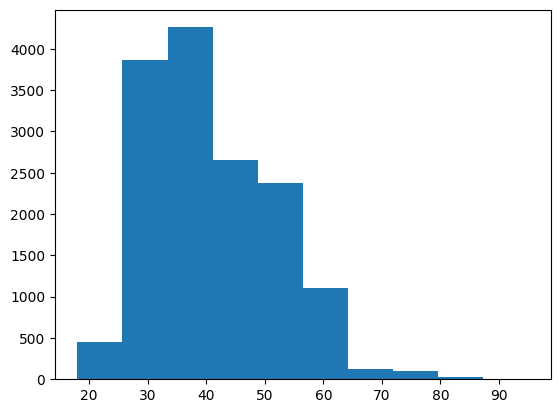

In [ ]:
plt.hist(df_test['age']);

In [ ]:
# 欠損値を平均値で補完
df_test = df_test.fillna({'age':df_test['age'].mean()})

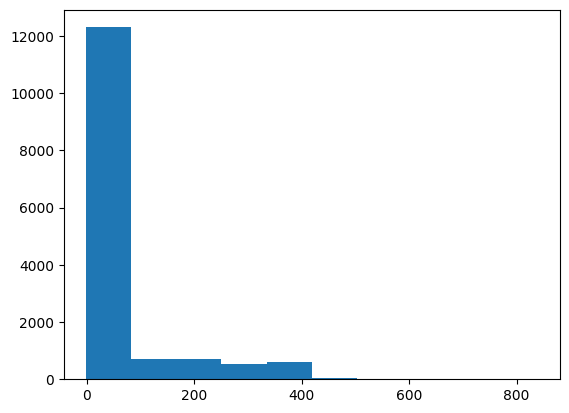

In [ ]:
plt.hist(df_test['pdays']);

#### 文字列

In [ ]:
# 欠損値を中央値で補完
df_test = df_test.fillna({'pdays':df_test['pdays'].median()})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'job':df_test['job'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'marital':df_test['marital'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'default':df_test['default'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'housing':df_test['housing'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'loan':df_test['loan'].mode()[0]})

In [ ]:
# 最頻値を使用して欠損値を補完
df_test = df_test.fillna({'poutcome':df_test['poutcome'].mode()[0]})

In [ ]:
# 欠損値の数を確認
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

#### カテゴリカル変数

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_test_obj = df_test.select_dtypes(include='object')
df_test_obj.head(3)

,job,marital,education,default,housing,loan,poutcome,result
0,self-employed,married,tertiary,no,yes,no,unknown,fail
1,management,married,tertiary,no,yes,no,unknown,fail
2,technician,married,secondary,no,no,yes,unknown,success


In [ ]:
for uni in df_train_obj.columns:
    print(uni)
    print(df_train_obj[uni].unique())

job
['entrepreneur' 'technician' 'blue-collar' 'retired' 'management'
 'unknown' 'admin.' 'student' 'services' 'unemployed' 'self-employed'
 'housemaid']
marital
['married' 'single' 'divorced']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['yes' 'no']
poutcome
['unknown' 'success' 'failure' 'other']
result
['fail' 'success']


##### 2種類のものをLabel Encording

In [ ]:
# それぞれの列のユニークな値の数を確認
df_test_uni = df_test_obj.nunique()
df_test_uni

job          12
marital       3
education     4
default       2
housing       2
loan          2
poutcome      4
result        2
dtype: int64

In [ ]:
df_test_cols = df_test_uni[df_test_uni==2].index
df_test_cols

Index(['default', 'housing', 'loan', 'result'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_test_cols:
  le = LabelEncoder()
  le.fit(df_test[col])
  df_test[col] = le.transform(df_test[col])

In [ ]:
# Encodingが完了していることを確認
df_test[df_test_cols].head(2)

,default,housing,loan,result
0,0,1,0,0
1,0,1,0,0


In [ ]:
# それぞれを置換するリストの作成
job_class = []
for i in df_test_obj['job']:
    if i in class_3:
        job_class.append(3)
    elif i in class_2:
        job_class.append(2)
    elif i in class_1:
        job_class.append(1)

In [ ]:
# データフレームをコピー
df_test2 = df_test.copy()

In [ ]:
# 列を追加
df_test2['job_class']  = job_class

In [ ]:
df_test2

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result,job_class
0,55.0,self-employed,married,tertiary,0,1810,1,0,-1.0,0,unknown,0,2
1,54.0,management,married,tertiary,0,364,1,0,-1.0,0,unknown,0,3
2,35.0,technician,married,secondary,0,-180,0,1,-1.0,0,unknown,1,2
3,58.0,retired,married,primary,0,69,0,0,-1.0,0,unknown,0,1
4,48.0,management,married,tertiary,0,2351,0,0,105.0,3,success,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,blue-collar,divorced,secondary,0,-244,1,0,-1.0,0,unknown,0,1
14996,53.0,self-employed,married,tertiary,0,730,1,0,368.0,2,failure,0,2
14997,31.0,management,married,tertiary,0,898,0,0,-1.0,0,unknown,0,3
14998,49.0,blue-collar,married,primary,0,6429,0,0,-1.0,0,unknown,0,1


##### One Hot Encording

In [ ]:
df_test2 = pd.get_dummies(df_test2, drop_first=True)

In [ ]:
df_test2

,age,default,balance,housing,loan,pdays,previous,result,job_class,job_blue-collar,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,55.0,0,1810,1,0,-1.0,0,0,2,0,...,0,0,1,0,0,1,0,0,0,1
1,54.0,0,364,1,0,-1.0,0,0,3,0,...,0,0,1,0,0,1,0,0,0,1
2,35.0,0,-180,0,1,-1.0,0,1,2,0,...,0,0,1,0,1,0,0,0,0,1
3,58.0,0,69,0,0,-1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,48.0,0,2351,0,0,105.0,3,1,3,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,0,-244,1,0,-1.0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
14996,53.0,0,730,1,0,368.0,2,0,2,0,...,0,0,1,0,0,1,0,0,0,0
14997,31.0,0,898,0,0,-1.0,0,0,3,0,...,0,0,1,0,0,1,0,0,0,1
14998,49.0,0,6429,0,0,-1.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
x_test = df_test2.drop('result', axis=1).values
t_test = df_test2['result'].values

### pred 前処理

In [ ]:
# 欠損値の数を確認
df_pred.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
dtype: int64

##### カテゴリカル変数

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_pred_obj = df_pred.select_dtypes(include='object')
df_pred_obj.head(3)

,job,marital,education,default,housing,loan,poutcome
0,services,married,secondary,no,no,no,unknown
1,blue-collar,married,secondary,no,yes,no,failure
2,admin.,married,unknown,no,yes,no,unknown


In [ ]:
for uni in df_pred_obj.columns:
    print(uni)
    print(df_pred_obj[uni].unique())

job
['services' 'blue-collar' 'admin.' 'management' 'unemployed' 'housemaid'
 'entrepreneur' 'student' 'technician' 'self-employed' 'retired' 'unknown']
marital
['married' 'divorced' 'single']
education
['secondary' 'unknown' 'primary' 'tertiary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
poutcome
['unknown' 'failure' 'other' 'success']


In [ ]:
# それぞれの列のユニークな値の数を確認
df_pred_uni = df_pred_obj.nunique()
df_pred_uni

job          12
marital       3
education     4
default       2
housing       2
loan          2
poutcome      4
dtype: int64

In [ ]:
df_pred_cols = df_pred_uni[df_pred_uni==2].index
df_pred_cols

Index(['default', 'housing', 'loan'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_pred_cols:
  le = LabelEncoder()
  le.fit(df_pred[col])
  df_pred[col] = le.transform(df_pred[col])

In [ ]:
# Encodingが完了していることを確認
df_pred[df_pred_cols].head(2)

,default,housing,loan
0,0,0,0
1,0,1,0


In [ ]:
# それぞれを置換するリストの作成
job_class = []
for i in df_pred_obj['job']:
    if i in class_3:
        job_class.append(3)
    elif i in class_2:
        job_class.append(2)
    elif i in class_1:
        job_class.append(1)

In [ ]:
# データフレームをコピー
x_pred = df_pred.copy()

In [ ]:
# 列を追加
x_pred['job_class']  = job_class

In [ ]:
x_pred

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,job_class
0,53,services,married,secondary,0,1364,0,0,-1,0,unknown,2
1,36,blue-collar,married,secondary,0,1949,1,0,319,3,failure,1
2,40,admin.,married,unknown,0,3557,1,0,-1,0,unknown,3
3,51,management,divorced,secondary,0,-175,1,1,-1,0,unknown,3
4,41,unemployed,married,secondary,0,277,1,0,351,2,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,entrepreneur,married,tertiary,0,1076,1,0,-1,0,unknown,3
9996,53,technician,divorced,primary,0,-834,1,1,-1,0,unknown,2
9997,42,technician,divorced,secondary,0,324,1,0,-1,0,unknown,2
9998,38,management,single,tertiary,0,231,0,0,-1,0,unknown,3


In [ ]:
x_pred = pd.get_dummies(x_pred, drop_first=True)

In [ ]:
x_pred

,age,default,balance,housing,loan,pdays,previous,job_class,job_blue-collar,job_entrepreneur,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,53,0,1364,0,0,-1,0,2,0,0,...,0,0,1,0,1,0,0,0,0,1
1,36,0,1949,1,0,319,3,1,1,0,...,0,0,1,0,1,0,0,0,0,0
2,40,0,3557,1,0,-1,0,3,0,0,...,0,0,1,0,0,0,1,0,0,1
3,51,0,-175,1,1,-1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,1
4,41,0,277,1,0,351,2,1,0,0,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,0,1076,1,0,-1,0,3,0,1,...,0,0,1,0,0,1,0,0,0,1
9996,53,0,-834,1,1,-1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,42,0,324,1,0,-1,0,2,0,0,...,0,0,0,0,1,0,0,0,0,1
9998,38,0,231,0,0,-1,0,3,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
print(df_train2.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'pdays', 'previous',
       'result', 'job_class', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [ ]:
print(x_pred.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'pdays', 'previous',
       'job_class', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


## モデルの実装

In [ ]:
#XBoost
# モデルの定義
from xgboost import XGBClassifier
model = XGBClassifier()

# モデルの学習
model.fit(x_train, t_train)

# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('val score : ', model.score(x_val, t_val))
print('test score : ', model.score(x_test, t_test))

train score :  0.9436651079937654
val score :  0.8893506493506493
test score :  0.8918666666666667


In [ ]:
# 推論
y_pred = model.predict(x_val)

## 混同行列

In [ ]:
from sklearn import metrics

In [ ]:
# 混同行列の作成
labels = list(set(df_train['result'].values))
c_matrix = metrics.confusion_matrix(t_val, y_pred, labels=labels)

In [ ]:
np.unique(y_pred)

array([0, 1])

In [ ]:
# DataFrameに整形
df_val_matrix = pd.DataFrame(c_matrix, columns=labels, index=labels)
df_val_matrix

,0,1
0,1660,37
1,176,52


In [ ]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_val, y_pred)

In [ ]:
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0','Label 1']
)

In [ ]:
df_total

,Label 0,Label 1
Total,1697.000000,228.000000
Precision,0.904139,0.584270
Recall,0.978197,0.228070
F1_score,0.939711,0.328076


In [ ]:
f1_score = metrics.f1_score(t_val, y_pred, average=None)
f1_score

array([0.93971129, 0.32807571])

In [ ]:
# 閾値調整前
from sklearn.metrics import f1_score
f1_score(t_val, y_pred, average='macro')

0.633893501648718

## 閾値調整

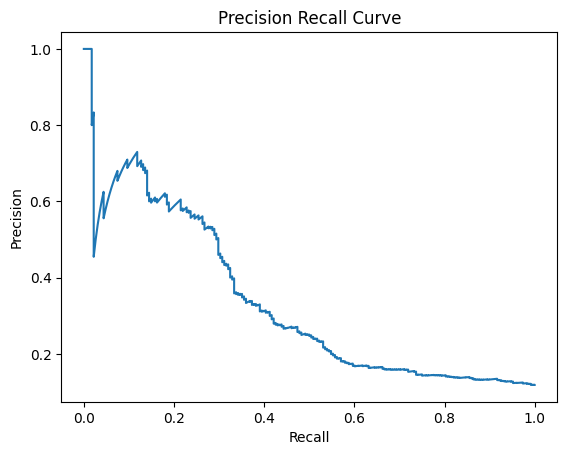

In [ ]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline

# 陽性の確率だけが必要なので[:, 1]をして陰性の確率を落とす
pos_prob = model.predict_proba(x_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(t_val, pos_prob)
# 可視化
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

1772th threshold(=0.36) is highest f1 score =0.37


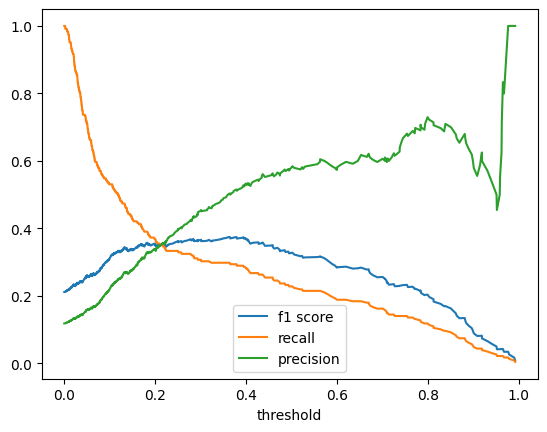

In [ ]:
from scipy.stats import hmean
# F値計算
f1_scores = []
for p, r in zip(precision, recall):
    f1 = hmean([p, r])
    f1_scores.append(f1)
# Precision, Recall, F値を可視化
plt.plot(thresholds, f1_scores[:-1], label='f1 score')
plt.plot(thresholds, recall[:-1], label='recall')
plt.plot(thresholds, precision[:-1], label='precision')
plt.xlabel('threshold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is highest f1 score ={np.max(f1_scores):.2f}')

In [ ]:
y_proba = model.predict_proba(x_val)
y_proba[0]

array([0.94420934, 0.05579068], dtype=float32)

In [ ]:
y_pred = (y_proba[:,1] > 0.36).astype('i')

In [ ]:
print('accuracy : ', metrics.accuracy_score(t_val, y_pred))

accuracy :  0.8820779220779221


In [ ]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_val, y_pred)

In [ ]:
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0','Label 1']
)

In [ ]:
df_total

,Label 0,Label 1
Total,1697.000000,228.000000
Precision,0.910615,0.503704
Recall,0.960519,0.298246
F1_score,0.934901,0.374656


In [ ]:
## 閾値調整後
from sklearn.metrics import f1_score
f1_score(t_val, y_pred, average='macro')

0.6547783542334732

# Pred

In [ ]:
y_pred = model.predict(x_pred)

In [ ]:
y_proba = model.predict_proba(x_pred)
y_proba[0]

array([0.810547  , 0.18945298], dtype=float32)

In [ ]:
y_pred = (y_proba[:,1] > 0.36).astype('i')

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# 推論結果を、 success, fail に書き換える

y_list = np.where(y_pred,
                 'success', 'fail').tolist()

In [ ]:
y_list

['fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'success',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail',
 'fail'

In [ ]:
pd.Series(y_list, name='pred').to_csv('submission.csv', index=None)